In [1]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Reading all datasets as pandas dataframes

hurricane_data = pd.read_csv('BRTK_SHIPS_2000to2019_IMERG_OK_Request_2023_FINAL.csv')
population_data = pd.read_csv('florida-population-2023-07-08.csv')
labor_data = pd.read_csv('labor-productivity-by-state-and-region.csv')

In [51]:
# Failed attempt to filter out all storms that did hit Florida

all_florida_storms = hurricane_data[hurricane_data['LATITUDE'].all() <= 31.0 and hurricane_data['LONGITUDE'].all() >= -87.0]
all_florida_storms.head()

KeyError: True

In [13]:
# Successful attempt to filter out all storms that did hit Florida

all_florida_storm_indicies = []
for i in range(len(hurricane_data)):
    if(24.5 <= hurricane_data['LATITUDE'][i] <= 31.0 and -79.8 >= hurricane_data['LONGITUDE'][i] >= -87.0):
        all_florida_storm_indicies.append(i)

all_florida_storms = hurricane_data.iloc[all_florida_storm_indicies]
all_florida_storms.head()

,GIS_ID,BASIN,DATE,JULDAY,LATITUDE,LONGITUDE,MSLP,STORM_NAME,STORM_ID,CAT,...,TADV_12,TADV_13,HMEAN100,RA300,HRA100,HRA300,RAIN_AXIS_100,RAIN_AXIS_300,RAIN_AXIS_100_300,RMR
158,ATL_200011_C1_2000091700,ATL,2000091700,2451804.50,25.200001,-85.400002,985,GORDON,200011,C1,...,-999.0,-999.0,15.988711,0.560085,0.416404,0.252393,47.845856,42.621845,39.690224,235
159,ATL_200011_C1_2000091706,ATL,2000091706,2451804.75,26.100000,-84.900002,981,GORDON,200011,C1,...,-999.0,-999.0,8.641450,0.624247,0.362776,0.171570,65.511658,43.243092,32.676018,215
160,ATL_200011_C1_2000091712,ATL,2000091712,2451805.00,27.100000,-84.300003,987,GORDON,200011,C1,...,-999.0,-999.0,8.859593,0.551223,0.047319,0.077632,54.603168,45.882404,42.300529,175
161,ATL_200011_C1_2000091718,ATL,2000091718,2451805.25,28.000000,-83.800003,985,GORDON,200011,C1,...,-999.0,-999.0,6.096287,0.388869,0.025237,0.019851,44.205284,29.320780,22.299374,345
162,ATL_200011_TS_2000091800,ATL,2000091800,2451805.50,28.900000,-83.400002,989,GORDON,200011,TS,...,-999.0,-999.0,5.810147,0.437434,0.015773,0.036157,72.779587,59.057453,51.857956,175


In [29]:
# Testing around with the population data because of my failure to use .loc

print(population_data.head())
print(population_data.iloc[:, 0])
print(population_data.iloc[:, 1])

      Date   Population   Annual Change
0  12/1/00       530000             NaN
1  12/1/01       544000            2.64
2  12/1/02       565000            3.86
3  12/1/03       587000            3.89
4  12/1/04       599000            2.04
0      12/1/00
1      12/1/01
2      12/1/02
3      12/1/03
4      12/1/04
        ...   
118    12/1/18
119    12/1/19
120    12/1/20
121    12/1/21
122    12/1/22
Name: Date, Length: 123, dtype: object
0        530000
1        544000
2        565000
3        587000
4        599000
         ...   
118    21254926
119    21492056
120    21589602
121    21828069
122    22244823
Name:  Population, Length: 123, dtype: int64


In [47]:
# Simplify how years are displayed in the population data

for i in range(len(population_data)):
    population_data.iloc[i, 0] = population_data.iloc[i, 0][-2:]
    if(i < 100):
        population_data.iloc[i, 0] = '19' + population_data.iloc[i, 0]
    else:
        population_data.iloc[i, 0] = '20' + population_data.iloc[i, 0]
print(population_data.iloc[:, 0])

0      1900
1      1901
2      1902
3      1903
4      1904
       ... 
118    2018
119    2019
120    2020
121    2021
122    2022
Name: Date, Length: 123, dtype: object


-6.1000000000000005 128.1


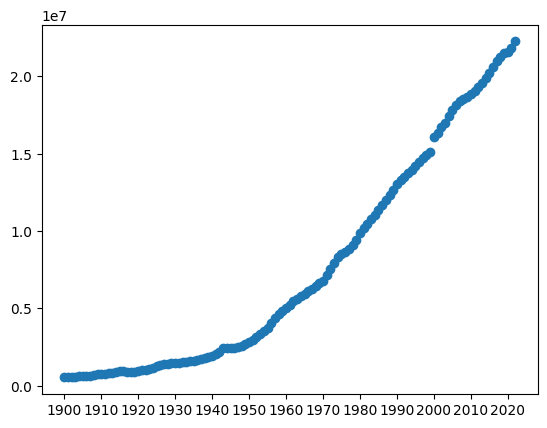

In [50]:
# Plotting population data over year
# Tick marks are set to every 10 years

fig, ax = plt.subplots()
plt.scatter(x = population_data.iloc[:, 0], y = population_data.iloc[:, 1])
start, end = ax.get_xlim()
start, end = 0, 128
ax.xaxis.set_ticks(np.arange(start, end, 10))
plt.show()